In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf

def read_arff(path):
  raw_data,meta = loadarff(path)
  # print(raw_data, meta)
  cols = [x for x in meta]
  # print(cols)
  data2d = np.zeros([raw_data.shape[0], len(cols)])

  # print(cols,range(len(cols)), len(cols) )
  for i, col in zip(range(len(cols)), cols):
    data2d[:, i] = raw_data[col]
    
  return data2d



# file_path = '/gdrive/MyDrive/kamp/FordA'
file_path = '/content/drive/MyDrive'
train_fn = '/FordA_TRAIN.arff'
test_fn = '/FordA_TEST.arff'

train = read_arff(file_path + train_fn)
test = read_arff(file_path + test_fn)

In [3]:
train.shape, test.shape, type(train)

((3601, 501), (1320, 501), numpy.ndarray)

In [ ]:
train[:,0]

array([-0.79717168,  0.80485472,  0.7279851 , ..., -0.57005428,
        2.0067321 , -0.12524091])

In [ ]:
## loadarff에서 meta 데이터의 특성

raw_data,meta = loadarff(file_path + train_fn)
print(raw_data['att1'])
print(len(raw_data['att1']))
print(raw_data['att2'])

[-0.79717168  0.80485472  0.7279851  ... -0.57005428  2.0067321
 -0.12524091]
3601
[-0.66439208  0.63462859  0.11128392 ... -0.33316523  2.0791499
 -0.32536268]


In [ ]:
train[:,-1], test[:,-1]

(array([-1.,  1., -1., ..., -1.,  1., -1.]),
 array([-1., -1., -1., ...,  1.,  1.,  1.]))

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, 0 to 500
dtypes: float64(501)
memory usage: 13.8 MB


In [ ]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,...,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,-0.016708,-0.015270,-0.013605,-0.011943,-0.009966,-0.007062,-0.003495,0.000568,0.005354,0.010032,...,0.006895,0.004053,0.000929,-0.001922,-0.003369,-0.003237,-0.001820,0.000031,0.001395,-0.025271
std,1.058455,1.051904,1.044560,1.042573,1.046933,1.052829,1.055439,1.054305,1.050424,1.044120,...,1.040632,1.040826,1.036657,1.028358,1.018719,1.011871,1.012367,1.020914,1.032490,0.999819
min,-3.933454,-3.656912,-3.479467,-3.595350,-3.773891,-3.914729,-3.855301,-4.497360,-4.552591,-4.000282,...,-4.073011,-4.014450,-3.817036,-3.574256,-3.746353,-3.680805,-3.904569,-4.221550,-4.076032,-1.000000
25%,-0.685693,-0.699526,-0.688302,-0.709732,-0.694991,-0.691035,-0.690316,-0.701244,-0.675094,-0.687749,...,-0.690143,-0.688232,-0.677701,-0.674282,-0.655946,-0.657258,-0.664392,-0.659578,-0.675838,-1.000000
50%,-0.007573,-0.003044,-0.003066,0.008598,0.001042,0.000280,-0.011988,-0.026672,-0.002031,0.010602,...,0.012348,0.003914,0.005957,-0.002728,-0.010841,-0.008002,-0.004802,-0.013723,-0.003186,-1.000000
75%,0.660360,0.674898,0.683698,0.679474,0.697530,0.688802,0.721442,0.705021,0.692256,0.689118,...,0.714817,0.707357,0.692837,0.666434,0.668463,0.671536,0.677346,0.684048,0.682921,1.000000
max,3.503936,3.369278,3.498286,3.493830,3.293318,3.605585,3.895870,3.741035,3.630933,3.579176,...,3.522197,3.842693,3.916653,3.670118,3.567879,3.471847,3.798079,3.863325,4.349744,1.000000


In [ ]:
# 결측치 확인

for x in range(len(train_df.columns)):
  if train_df[x].isnull().sum() > 0 :
     print(x, train_df[x].isnull().sum())

In [ ]:
len(train_df.columns)

501

In [ ]:
## 정규성 검정 - Anderson-Darling 검정
# https://dibrary.tistory.com/61

import scipy.stats as stats

test_ad = stats.anderson(train_df[1], dist= 'norm')
print(test_ad)

# 첫번째 Statistic은 검정 통계량 즉, A^2 값
#  critical_values는 각 유의수준에서의 임계값 (이 값을 검정 통계량이 넘으면 귀무가설 기각하여 정규하지 않음)
# significance_level은 유의수준 즉 15%, , 10% ,  5% ,  2.5%,  1%

# 검정 통계량 0.9458722726076303이 1.091보다 작으므로 신뢰수준 99%(유의수준 1%) 수준에서도,  정규성을 만족함
# 검정 통계량 0.9458722726076303이 0.786보다 작으므로 신뢰수준 95%(유의수준 5%) 수준에서도,  정규성을 만족하지 못함

# => 유의수준 1%를 기준으로 정규성 확인해보자.

AndersonResult(statistic=0.9458722726076303, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
## 정규성 검정 - Anderson-Darling 검정
# https://dibrary.tistory.com/61

n_norm_index = []
for i in range(len(train_df.columns)):

  test_ad = stats.anderson(train_df[i], dist= 'norm')

  if test_ad.statistic >= test_ad.critical_values[4]:
    n_norm_index.append(i)
    print(i, test_ad.statistic )

n_norm_index.remove(500)  ## Target은 스케일링 대상에서 제외
print(n_norm_index)


0 1.3765762898747198
118 1.3921365798837542
119 1.3590685000635858
126 1.5706172947880077
127 1.3664197697598865
140 1.6784273392631803
262 1.1752227165652585
263 1.4276546800833785
264 1.8638669939937245
265 1.445848612921509
271 1.1741084264876918
336 1.3613178576888458
337 1.2456653489180098
412 1.540143751110918
487 1.1618288752570152
500 647.2757351339969
[0, 118, 119, 126, 127, 140, 262, 263, 264, 265, 271, 336, 337, 412, 487]


In [ ]:
# 추가적으로 표준화는 정규성에 영향을 주지 못했음 
# 그러나, Log1p 실행을 위해서는 값이 음수가 되어서는 안되므로 MinMax 스케일러 적용  => MinMax 적용후 Log스케일하면 오히려 정규성이 악화됨
# 일부 데이터의 비정규성은 그냥 용납하고 넘어가자 ㅜㅜ (-1보다 작은 음수를 포함한 경우 보정이 어려운 것 같다)

# from sklearn.preprocessing import MinMaxScaler

# train_df_temp = train_df[n_norm_index].copy()
# scaler = MinMaxScaler()  ## 표준화 객체 생성
# scaler.fit(train_df_temp)

# train_df_array = scaler.transform(train_df_temp)

# train_df[n_norm_index] = pd.DataFrame(train_df_array) 

In [ ]:
# train_df

In [ ]:
## Log 스케일로 정규성 확보

# train_df_temp = train_df[n_norm_index].copy()

# train_df[n_norm_index] = np.log1p(train_df_temp)



In [ ]:
## 정규성 재확인

# n_norm_index = []
# for i in train_df.columns:

#   test_ad = stats.anderson(train_df[i], dist= 'norm')

#   if test_ad.statistic >= test_ad.critical_values[4]:
#     n_norm_index.append(i)
#     print(i, test_ad.statistic )

# print(n_norm_index)

In [ ]:
# train_df

In [ ]:
# train = train_df.to_numpy()

In [ ]:
np.savetxt('test.csv', train, delimiter=',', fmt='%s')


In [5]:
x_train_temp = train[:, :-1]
y_train_temp = train[:, -1]

x_test_temp = test[:, :-1]
y_test_temp = test[:, -1]

x_train_temp, y_train_temp

(array([[-0.79717168, -0.66439208, -0.37301463, ..., -0.66439208,
         -1.0737958 , -1.5643427 ],
        [ 0.80485472,  0.63462859,  0.37347448, ..., -0.71488505,
         -0.56044294, -0.31908642],
        [ 0.7279851 ,  0.11128392, -0.49912439, ...,  0.39446303,
          0.33940042,  0.25539062],
        ...,
        [-0.57005428, -0.33316523, -0.29351853, ..., -1.3937145 ,
         -0.94273327, -0.27072168],
        [ 2.0067321 ,  2.0791499 ,  2.0220362 , ..., -0.43214504,
         -0.44123126, -0.28070891],
        [-0.12524091, -0.32536268, -0.48823697, ...,  0.55576053,
          0.57445102,  0.57311598]]),
 array([-1.,  1., -1., ..., -1.,  1., -1.]))

In [ ]:
# ## 데이터 Train과 Valid로 나누기 

# from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid =  train_test_split(x_train_temp, y_train_temp, test_size = 0.2, stratify= y_train_temp, random_state = 1) 

# x_train.shape, x_valid.shape

In [ ]:
# ## Stratified가 잘 되었는지 확인
# import pandas as pd

# sum(y_train == 1), sum(y_train == -1),sum(y_valid == 1),sum(y_valid == -1)


In [ ]:
# x_train.shape, x_valid.shape

In [ ]:
## 랜덤 포레스트 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

x_train = x_train_temp.copy()
y_train = y_train_temp.copy()


RF = RandomForestClassifier(random_state = 1)
parameters = {'max_depth' : [3,5,7], 'min_samples_split' : [2,3,4]}  

stratified_5_fold_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_RF = GridSearchCV(RF, param_grid= parameters, cv = stratified_5_fold_cv , refit = True)
grid_RF.fit(x_train, y_train)
RF_best_estimator = grid_RF.best_estimator_ 

print('### GridSearchCV 관련 요소 :' ,grid_RF.best_score_, grid_RF.best_params_, grid_RF.cv_results_, sep = '\n', end = '\n\n')


KeyboardInterrupt: ignored

In [ ]:
## 랜덤 포레스트 테스트

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

x_test = x_test_temp.copy()
y_test = y_test_temp.copy()

pred = RF_best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Accuracy:{0:.4f}, Precision:{1:.4f}, Recall:{2:.4f}, F1:{3:.4f}' .format(accuracy , precision ,recall, f1))

Accuracy:0.7152, Precision:0.7467, Recall:0.6228, F1:0.6792


In [ ]:
train_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,1.000000,0.955441,0.824725,0.624149,0.384718,0.141105,-0.081436,-0.269796,-0.419172,-0.531380,...,-0.015618,-0.019913,-0.023282,-0.024699,-0.023207,-0.018717,-0.011458,-0.002540,0.006706,-0.001757
1,0.955441,1.000000,0.953253,0.817840,0.615756,0.380432,0.142303,-0.077788,-0.266956,-0.420095,...,-0.012603,-0.017161,-0.020554,-0.022192,-0.021397,-0.018186,-0.012603,-0.005416,0.002471,0.000238
2,0.824725,0.953253,1.000000,0.951913,0.816276,0.618187,0.387548,0.150078,-0.073239,-0.267894,...,-0.008995,-0.013026,-0.015697,-0.016976,-0.016548,-0.014561,-0.010909,-0.006001,-0.000217,0.002701
3,0.624149,0.817840,0.951913,1.000000,0.952416,0.820269,0.626396,0.396051,0.155091,-0.073066,...,-0.005665,-0.008267,-0.009394,-0.009632,-0.009112,-0.008102,-0.006411,-0.004099,-0.000983,0.004684
4,0.384718,0.615756,0.816276,0.952416,1.000000,0.953921,0.824793,0.631320,0.398501,0.154771,...,-0.002897,-0.003520,-0.002723,-0.001623,-0.000769,-0.000478,-0.000517,-0.000659,-0.000249,0.005346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.018717,-0.018186,-0.014561,-0.008102,-0.000478,0.006716,0.012059,0.014294,0.013025,0.008671,...,0.131131,0.373025,0.608567,0.810641,0.949709,1.000000,0.948890,0.805932,0.600453,0.009432
497,-0.011458,-0.012603,-0.010909,-0.006411,-0.000517,0.005334,0.009759,0.011494,0.010203,0.006105,...,-0.103124,0.118639,0.359530,0.598322,0.805745,0.948890,1.000000,0.949883,0.812772,0.004506
498,-0.002540,-0.005416,-0.006001,-0.004099,-0.000659,0.003181,0.006184,0.007151,0.005758,0.001965,...,-0.298707,-0.114149,0.105857,0.349404,0.593625,0.805932,0.949883,1.000000,0.952489,-0.002224
499,0.006706,0.002471,-0.000217,-0.000983,-0.000249,0.001242,0.002508,0.002483,0.000803,-0.002810,...,-0.447935,-0.306022,-0.121994,0.101427,0.350923,0.600453,0.812772,0.952489,1.000000,-0.008980


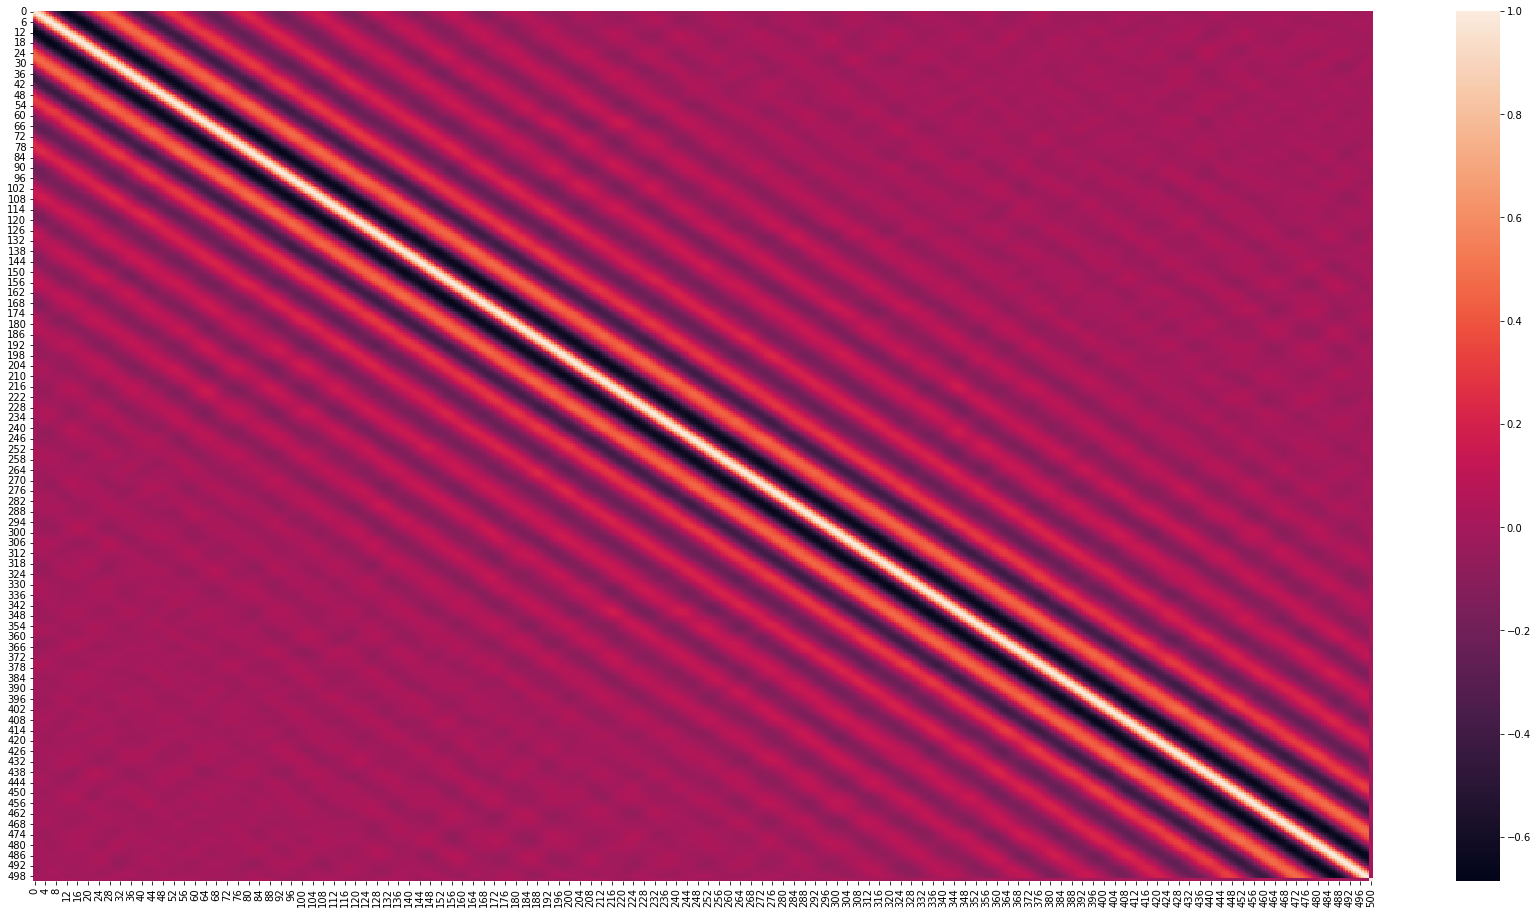

In [ ]:
import seaborn as sns
plt.figure(figsize = (30,16))
sns.heatmap(data= train_df.corr())

In [ ]:
### 상관관계가 일정 수준 이상되는 목록 확인하기

r = 0.6

train_df.corr()

temp = ((train_df.corr() > r) | (train_df.corr() < -1*r)) & (train_df.corr() != 1) 
temp = np.array(temp)

result = np.argwhere(temp == True)

import sys

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
print(train_df.corr().columns[result])


## n번 센서는 [-3+n, +3+n]과 [n+10, n+13], [n-13, n-10]와 강한 상관관계를 가지고 있다. (단 계산결과 음수가 될 경우는 제외)
## 따라서 Local한 특징(근처 센서 간의 관계)을 학습하는 모델(i.e. CNN)이 좋은 성능을 보일 수 있을 것이라 예상해볼 수 있다  (알아두자!)

[[  0   1]
 [  0   2]
 [  0   3]
 [  0  10]
 [  0  11]
 [  0  12]
 [  0  13]
 [  1   0]
 [  1   2]
 [  1   3]
 [  1   4]
 [  1  11]
 [  1  12]
 [  1  13]
 [  1  14]
 [  2   0]
 [  2   1]
 [  2   3]
 [  2   4]
 [  2   5]
 [  2  12]
 [  2  13]
 [  2  14]
 [  2  15]
 [  3   0]
 [  3   1]
 [  3   2]
 [  3   4]
 [  3   5]
 [  3   6]
 [  3  13]
 [  3  14]
 [  3  15]
 [  3  16]
 [  4   1]
 [  4   2]
 [  4   3]
 [  4   5]
 [  4   6]
 [  4   7]
 [  4  14]
 [  4  15]
 [  4  16]
 [  4  17]
 [  4  18]
 [  5   2]
 [  5   3]
 [  5   4]
 [  5   6]
 [  5   7]
 [  5   8]
 [  5  15]
 [  5  16]
 [  5  17]
 [  5  18]
 [  5  19]
 [  6   3]
 [  6   4]
 [  6   5]
 [  6   7]
 [  6   8]
 [  6   9]
 [  6  16]
 [  6  17]
 [  6  18]
 [  6  19]
 [  6  20]
 [  7   4]
 [  7   5]
 [  7   6]
 [  7   8]
 [  7   9]
 [  7  10]
 [  7  17]
 [  7  18]
 [  7  19]
 [  7  20]
 [  8   5]
 [  8   6]
 [  8   7]
 [  8   9]
 [  8  10]
 [  8  11]
 [  8  18]
 [  8  19]
 [  8  20]
 [  8  21]
 [  9   6]
 [  9   7]
 [  9   8]
 [  9  10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


In [13]:
## CNN 

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


# 파라미터 설정    
learning_rate = 0.001
training_epochs = 100
batch_size = 100

y_train_temp[y_train_temp == -1] = 0
y_test_temp[y_test_temp == -1] = 0

x_train = torch.FloatTensor(x_train_temp).unsqueeze(1)   ## .unsqueeze(1) 해주는 이유 : .unsqueeze(1)를 해주지 않으면 x_train[0]의 shape이 (500,)이 되고 64크기로 배치를 하면 64,500이 된다.
y_train = torch.FloatTensor(y_train_temp).unsqueeze(1)   ## 하지만 Conv1d 클래스는 64 x 1 x 500의 크기를 기대하기 때문에, 일부러 차원을 1개 늘려준다. 
                                                         ## Conv2d가  채널크기 x 1 x 28 x 28   기대하듯이  Conv1d  는 채널크기 x 1 x 500 을 기대한다.
x_test = torch.FloatTensor(x_test_temp)
y_test = torch.FloatTensor(y_test_temp)

ds_train = TensorDataset(x_train, y_train)   # 데이터 셋으로 묶기
ds_test = TensorDataset(x_test, y_test)      # 데이터 셋으로 묶기

data_loader  = DataLoader(ds_train, batch_size = 64, shuffle = True)  # 데이터 로더 만들기 (배치 적용)







In [ ]:
x_train.shape

torch.Size([3601, 1, 500])

In [ ]:
for a,b in data_loader:

  print(a.shape, b.shape)

torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size([64, 1, 500]) torch.Size([64, 1])
torch.Size

In [ ]:
x_train[0].shape

torch.Size([1, 500])

In [7]:
## CNN 모델 클래스

from torch.nn.modules.batchnorm import BatchNorm1d

class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels= 1, out_channels = 32, kernel_size= 3, padding = 1, stride= 1 ),
            torch.nn.BatchNorm1d(32),
            torch.nn.ReLU()
        )

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels= 32, out_channels = 64, kernel_size= 3, padding = 1, stride= 1 ),
            torch.nn.BatchNorm1d(64),
            torch.nn.ReLU()
        )

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels= 64, out_channels = 64, kernel_size= 3, padding = 1, stride= 1 ),
            torch.nn.BatchNorm1d(64),
            torch.nn.ReLU()
        )

        self.gap = torch.nn.AdaptiveAvgPool1d(output_size = 64)             # https://underflow101.tistory.com/41  Pytorch에서의 GAP 
        self.fc1 = torch.nn.Linear(64, 1, bias=True)
        self.layer4 = torch.nn.Sequential(
        self.gap,
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(64),
        torch.nn.Dropout(p=1 - self.keep_prob),
        self.fc1,
        torch.nn.Sigmoid()
        )  ## BCELoss()는 시그모이드 함수 포함안되어 있음 

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)    # [-1, 64, 500]
        out = self.layer3(out) 
        out = out.view(out.size(0), -1) # Flatten 
        out = self.layer4(out)
        # print(out)
        return out



In [ ]:
m = torch.nn.Conv1d(16, 33, 3, stride=1, padding = 1)
n = torch.nn.AdaptiveAvgPool1d(output_size = 1) 
input = torch.randn(20, 16, 50)
output = m(input)
print(output.shape)
output = n(output)
output.shape

torch.Size([20, 33, 50])


torch.Size([20, 33, 1])

In [ ]:
# !pip install torchsummary
from torchsummary import summary

model = CNN().to(device)

summary(model, (1, 500))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 500]             128
       BatchNorm1d-2              [-1, 32, 500]              64
              ReLU-3              [-1, 32, 500]               0
            Conv1d-4              [-1, 64, 500]           6,208
       BatchNorm1d-5              [-1, 64, 500]             128
              ReLU-6              [-1, 64, 500]               0
            Conv1d-7              [-1, 64, 500]          12,352
       BatchNorm1d-8              [-1, 64, 500]             128
              ReLU-9              [-1, 64, 500]               0
AdaptiveAvgPool1d-10                   [-1, 64]               0
AdaptiveAvgPool1d-11                   [-1, 64]               0
             ReLU-12                   [-1, 64]               0
      BatchNorm1d-13                   [-1, 64]             128
          Dropout-14                   

In [ ]:
m = torch.nn.AdaptiveAvgPool1d(output_size = 1) 
inp = torch.randn(64,64,500)
output = m(inp)
output.size()

torch.Size([64, 64, 1])

In [14]:
# CNN 모델 학습
model = CNN().to(device)
    
    
criterion = torch.nn.BCELoss().to(device)   
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))


for epoch in range(training_epochs):
    avg_cost = 0
    
    model.train()

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.

        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))   


# torch.save(model.state_dict(), './torch_model.pth')
torch.save(model.state_dict(), './drive/MyDrive/torch_model.pth')

총 배치의 수 : 57
[Epoch:    1] cost = 0.511927724
[Epoch:    2] cost = 0.462207824
[Epoch:    3] cost = 0.445342064
[Epoch:    4] cost = 0.440007955
[Epoch:    5] cost = 0.429204822
[Epoch:    6] cost = 0.430882275
[Epoch:    7] cost = 0.411660463
[Epoch:    8] cost = 0.417479575
[Epoch:    9] cost = 0.397269905
[Epoch:   10] cost = 0.396179616
[Epoch:   11] cost = 0.382404804
[Epoch:   12] cost = 0.365065217
[Epoch:   13] cost = 0.366082042
[Epoch:   14] cost = 0.352304876
[Epoch:   15] cost = 0.343547851
[Epoch:   16] cost = 0.329358935
[Epoch:   17] cost = 0.336519033
[Epoch:   18] cost = 0.327010751
[Epoch:   19] cost = 0.314231902
[Epoch:   20] cost = 0.304898322
[Epoch:   21] cost = 0.290522814
[Epoch:   22] cost = 0.289700687
[Epoch:   23] cost = 0.283771008
[Epoch:   24] cost = 0.295719326
[Epoch:   25] cost = 0.309084952
[Epoch:   26] cost = 0.283865839
[Epoch:   27] cost = 0.272317201
[Epoch:   28] cost = 0.274959058
[Epoch:   29] cost = 0.289526194
[Epoch:   30] cost = 0.2594821

In [12]:
torch.save(model.state_dict(), './drive/MyDrive/torch_model.pth')



In [15]:
### 테스트


# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    
    model.eval()   ## 배치놈 인퍼런스 계산까지 포함됨 (평균, 편차, 감마, 베타 모두)
    

    X_test = x_test.unsqueeze(1)


    Y_test = y_test

    prediction = model(X_test)
    prediction = prediction.squeeze()

    prediction[prediction >= 0.5 ] = 1
    prediction[prediction < 0.5 ] = 0
    correct_prediction = (prediction == Y_test)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    


Accuracy: 0.9060605764389038


In [ ]:
y_test

tensor([0., 0., 0.,  ..., 1., 1., 1.])

In [ ]:
prediction

tensor([[0.],
        [0.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
correct_prediction[1].sum()

tensor(681)

In [ ]:
correct_prediction[0].size()

torch.Size([1320])

In [ ]:
correct_prediction.shape

torch.Size([1320, 1320])

https://gaussian37.github.io/dl-concept-global_average_pooling/

https://mole-starseeker.tistory.com/66

Global Average Pooling

GAP(global average pooling)은  Max(Average) Pooling 보다 더 급격하게 feature의 수를 줄인다.
또한 GAP의 목적은 앞에서 사용한 Pooling과 조금 다르다. GAP의 목적은 feature를 1차원 벡터로 만들기 위함이다.

FC Layer를 없애기 위한 방법으로 도입.
GAP 연산 결과 1차원 벡터가 되기 때문에 최종 출력에 FC Layer 대신 사용할 수 있다.
경우에 따라서 FC layer와 같이 사용 되기도 한다. FC layer에 전달하기 전에 GAP를 이용하여 차원을 줄여서 벡터로 만든 다음에 FC layer로 전달 하면 FC Layer에서 쉽게 사이즈를 맞출 수 있기 때문이다.

같은 채널 (같은 색)의 feature들을 모두 평균을 낸 다음에 채널의 갯수(색의 갯수) 만큼의 원소를 가지는 벡터로 만든다

파라미터가 많아지지 않기 때문에 오버피팅을 방지하고, 계산속도가 빠르다

또한 GAP 연산은 채널 별로 평균을 낼 뿐이고, 평균을 통해 얻은 클래스 개수만큼의 1차원 벡터와 클래스 라벨로 loss를 계산해 업데이트 했을 때, 
GAP 연산의 결과가 아닌 GAP 연산을 거치기 전의 컨볼루션 필터(커널)들을 학습시킨다. 이때 역전파를 통해 loss를 업데이트하면서 해당 컨볼루션 필터들은 이미지의 특징을 더 잘 잡도록 훈련될 것이며, 
그 부분이 response가 된다. 이 response 덕에 GAP 연산을 적용하면 FC Layer에 비해 location 정보를 상대적으로 덜 잃는 것으로 볼 수 있다

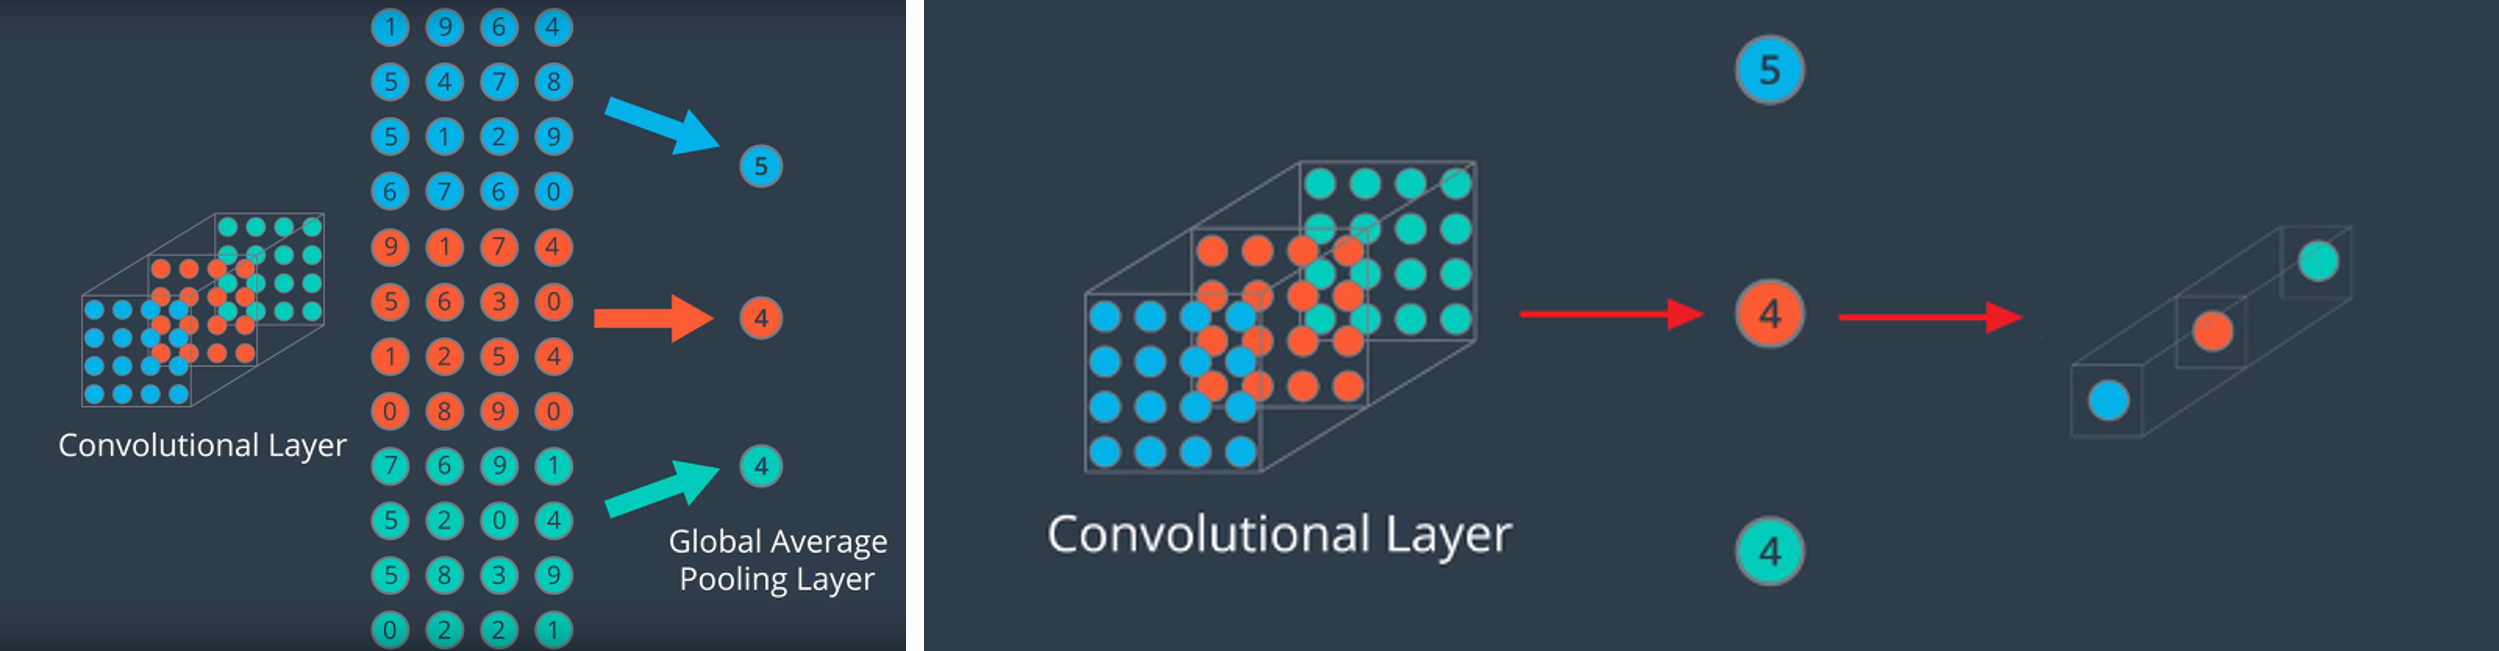

In [50]:
## 차원축소 활용해보기 (PCA)
from sklearn.decomposition import PCA

pca = PCA(100)   ## PC 성분을 100개로 뽑아보기
pca.fit(x_train_temp)
pc_transform = pca.transform(x_train_temp)

pc_transform.shape

(3601, 100)

In [51]:
ratio = pca.explained_variance_ratio_
ratio                  ### PC1이 8.7% 수준으로 비중이 크지 않아, 적합해보이지 않는다. 그래도 한번 해보자

array([0.08728876, 0.08501688, 0.06595972, 0.06463704, 0.0497319 ,
       0.04786817, 0.03413408, 0.03355615, 0.02827791, 0.02644521,
       0.02334392, 0.02255268, 0.02025868, 0.01962332, 0.01723728,
       0.01672926, 0.01348265, 0.01246622, 0.01131077, 0.01092428,
       0.01060946, 0.01055136, 0.00990309, 0.00986735, 0.00971199,
       0.00929558, 0.00917898, 0.00908597, 0.00896449, 0.00875711,
       0.00851907, 0.0084497 , 0.00836876, 0.0081648 , 0.00801393,
       0.007759  , 0.00754474, 0.0072925 , 0.00704613, 0.0070425 ,
       0.00636905, 0.00606767, 0.00535428, 0.0052062 , 0.00472449,
       0.00439229, 0.00378545, 0.00362699, 0.00349908, 0.00324852,
       0.00303849, 0.00295799, 0.00287926, 0.00276006, 0.00265814,
       0.00260913, 0.00255725, 0.00252731, 0.00246404, 0.00243614,
       0.00240035, 0.00236609, 0.00228178, 0.00223668, 0.00223236,
       0.00218952, 0.00212135, 0.00207703, 0.00204212, 0.00201508,
       0.0019945 , 0.00196737, 0.00194787, 0.00190269, 0.00185

In [52]:
ratio.sum()  ## PC 성분이 100개가 모이니 분산 비중이 99%를 넘는다.

0.9987459967609473

In [54]:
## 랜덤 포레스트 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

x_train = pc_transform.copy()
y_train = y_train_temp.copy()


RF = RandomForestClassifier(random_state = 1)
parameters = {'max_depth' : [3,5,7], 'min_samples_split' : [2,3,4]}  

stratified_5_fold_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_RF = GridSearchCV(RF, param_grid= parameters, cv = stratified_5_fold_cv , refit = True)
grid_RF.fit(x_train, y_train)
RF_best_estimator = grid_RF.best_estimator_ 

print('### GridSearchCV 관련 요소 :' ,grid_RF.best_score_, grid_RF.best_params_, grid_RF.cv_results_, sep = '\n', end = '\n\n')


### GridSearchCV 관련 요소 :
0.8275427646786868
{'max_depth': 7, 'min_samples_split': 3}
{'mean_fit_time': array([1.47213178, 1.19682837, 0.92939024, 1.36582112, 1.3675139 ,
       1.378826  , 1.98466883, 1.79807405, 1.76465783]), 'std_fit_time': array([0.63488359, 0.13664494, 0.00638411, 0.00940301, 0.01570881,
       0.01546547, 0.23991404, 0.07221677, 0.02074392]), 'mean_score_time': array([0.03475852, 0.03323607, 0.0163404 , 0.01863022, 0.01910982,
       0.01833248, 0.0230124 , 0.02043834, 0.01954536]), 'std_score_time': array([0.01974841, 0.01360661, 0.00024649, 0.00113066, 0.00223118,
       0.00037908, 0.00414734, 0.00125101, 0.00030418]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
             mask=[False, False, False, False, False, Fa

In [55]:
## 랜덤 포레스트 적용 Test 

pc_transform_test = pca.transform(x_test_temp)  # : Test 시에도 PCA 적용 필요,  https://chancoding.tistory.com/56


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

x_test = pc_transform_test .copy()
y_test = y_test_temp.copy()

pred = RF_best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Accuracy:{0:.4f}, Precision:{1:.4f}, Recall:{2:.4f}, F1:{3:.4f}' .format(accuracy , precision ,recall, f1))


## 성능이 향상되었다 !!!!! 
## 전체 차원이 너무 클 경우에는, 각 PC 성분이 작더라도 여러 PC를 쓰면 도움이 될수도 있다.!!!

Accuracy:0.8273, Precision:0.7923, Recall:0.8717, F1:0.8301


In [37]:
### PCA 사용한 다른 케이스 

import pandas as pd
import numpy as np

# 시각화 Library
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from pandas.plotting import scatter_matrix
from sklearn import datasets

#loading dataset
iris = datasets.load_iris()

In [20]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [23]:
X.shape, y.shape

((150, 4), (150,))

In [32]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(X)
PC_score = pca.transform(X)

PC_score.shape


(150, 3)

In [33]:
PC_score

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [34]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [35]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [36]:
ratio = pca.explained_variance_ratio_
ratio

array([0.92461872, 0.05306648, 0.01710261])

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      